In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [66]:
start_df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', low_memory=False)

In [16]:
start_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [67]:
start_df.shape

(100000, 151)

In [68]:
df = start_df.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**

In Prev view, I see lot of columns has null values, Lets do the analysis on null values on columns and remove the columns where 70% values are null. They won't help us much on doing anylysis. 

In [70]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [71]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(150)

Dataframe has 151 columns.
There are 73 columns that have missing values.


,Missing Values,% of Total Values
member_id,100000,100.0
revol_bal_joint,100000,100.0
sec_app_fico_range_high,100000,100.0
sec_app_earliest_cr_line,100000,100.0
sec_app_inq_last_6mths,100000,100.0
...,...,...
last_pymnt_d,71,0.1
revol_util,37,0.0
last_credit_pull_d,3,0.0
dti,2,0.0


Remove the columns which has 70% values null

In [72]:
remove = [i for i in df.count()<len(df) * 0.30]
df.drop(df.columns[remove], axis=1, inplace=True)
df.shape

(100000, 95)

Check the description of the columns to understand the meaning of the columns. 

In [5]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=4888d458ff51f1760fc3b29824551f82024bd4351c18d54cd7718a603262ee19
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
df_desc = pd.read_excel('LCDataDictionary.xls').dropna()
df_desc.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The annual income provided by the borrower during registration.
3,collection_recovery_fee,post charge off collection fee
4,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
5,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
6,desc,Loan description provided by the borrower
7,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
8,earliest_cr_line,The month the borrower's earliest reported credit line was opened
9,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


Analysis on column data types to understand how many objects, int and floats

Text(0, 0.5, 'Data type')

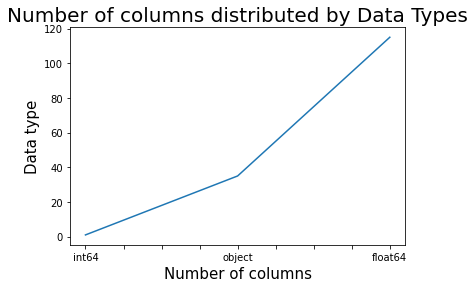

In [31]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot()
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

Check which columns contains object data types and uniques. 

In [20]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0).sort_values()

hardship_type                   1
hardship_flag                   1
verification_status_joint       1
next_pymnt_d                    1
issue_d                         1
disbursement_method             1
pymnt_plan                      1
term                            2
application_type                2
initial_list_status             2
hardship_status                 2
debt_settlement_flag            2
verification_status             3
settlement_status               3
home_ownership                  3
hardship_reason                 4
hardship_loan_status            4
hardship_start_date             4
payment_plan_start_date         5
hardship_end_date               5
loan_status                     5
grade                           7
purpose                        11
emp_length                     11
title                          11
debt_settlement_flag_date      12
settlement_date                15
sub_grade                      33
last_credit_pull_d             37
last_pymnt_d  

Let's check the years of employment anomalies

In [32]:
df['emp_length'].head()

0    10+ years
1    10+ years
2    10+ years
3    10+ years
4      3 years
Name: emp_length, dtype: object

Clean the years of employments

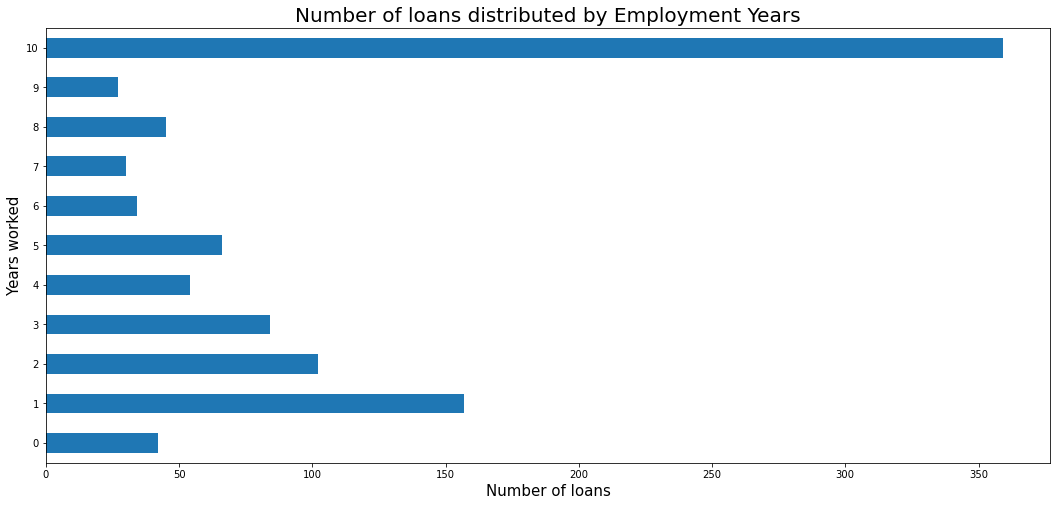

In [38]:
df['emp_length'].fillna(value=0, inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

The column looks fine. Also, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

Also we can check which employee title is getting more loans

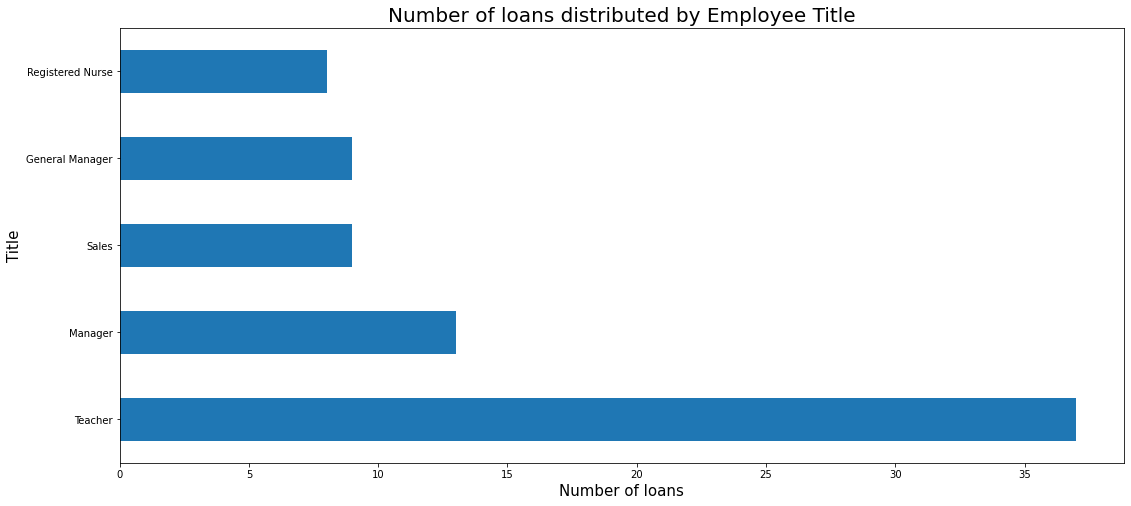

In [48]:
df['emp_title'].value_counts().sort_values(ascending=False).head().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employee Title',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Title',fontsize=15);

Remove the fields from dataframe where we're not going to do anylysis for now

In [73]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


Let's do analysis on loan status because It's important to understand the behaviour of loans. remove the rows where loan is still going on means they are not defaulter or fully paid. and It's not going to help us. 

In [75]:
df = df[~(df['loan_status']=='Current')]

In [76]:
df['loan_status'].value_counts()

Fully Paid            70288
Charged Off           17603
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: loan_status, dtype: int64

by looking the above view, we can do loan distribution by status

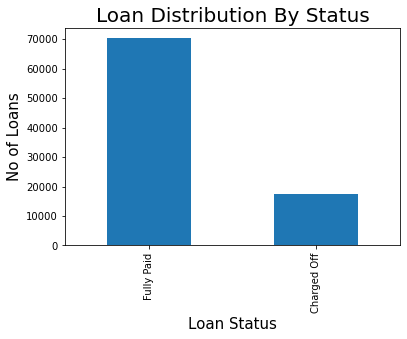

In [85]:
df.loan_status.value_counts().sort_values(ascending=False).head(2).plot(kind='bar')
plt.title('Loan Distribution By Status',fontsize=20)
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('No of Loans',fontsize=15);

# Exploratory Data Analysis

1. Default Rate with respect to Term

It clearly shows that Person who applied for high terms they are defaulter as well compare to Less Term applicant

Creating function which can be used for categorical dataset

In [98]:
df['loan_status_binary'] = df.loan_status.apply(lambda x: 0 if x =='Fully Paid' else 1)
df['loan_status_binary'].count()
df['loan_status_binary'].value_counts()

0    70288
1    18310
Name: loan_status_binary, dtype: int64

In [94]:
def graph_bar(x_val):
    result = df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot = sns.barplot(x=x_val, y='loan_status_binary',estimator=lambda x: sum(x) / len(x) * 100,
                        data=df,order=result[x_val],palette="RdYlBu")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)

In [95]:
def graph_bar_without_perc(x_val):
    result_1 = df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot_1 = sns.barplot(x=x_val, y='loan_status_binary',
                        data=df,order=result_1[x_val],estimator=sum,palette="RdYlBu")
    for p in splot_1.patches:
        splot_1.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)

Text(0.5, 0, 'Term in Months')

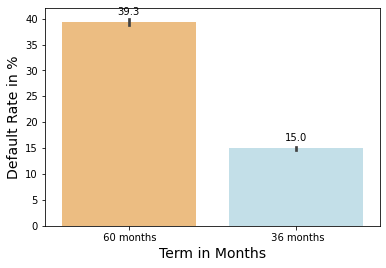

In [100]:
graph_bar('term')
plt.xlabel("Term in Months", size=14)

2. Default Rate wrt Interest rate Grade

It clearly shows that Applicant which has high Grade they have deaulter Rate also high as well compare to Grade A applicant

Text(0.5, 0, ' Interest Rate Grade')

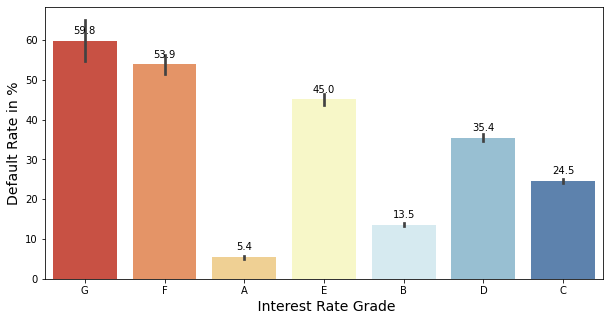

In [103]:
plt.figure(figsize=(10,5))
graph_bar('grade')
plt.xlabel(" Interest Rate Grade", size=14)

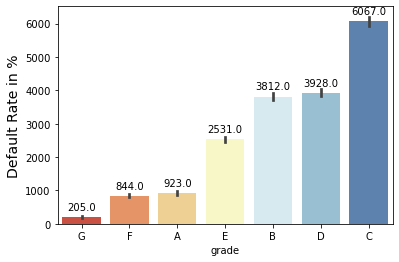

In [104]:
graph_bar_without_perc('grade')

In [106]:
loan_interest_grade_by_status = df.groupby(['grade','loan_status'])['loan_status'].count()
loan_interest_grade_by_status

grade  loan_status       
A      Charged Off             907
       Fully Paid            16152
       In Grace Period           4
       Late (31-120 days)       12
B      Charged Off            3699
       Fully Paid            24328
       In Grace Period          32
       Late (16-30 days)         5
       Late (31-120 days)       76
C      Charged Off            5803
       Fully Paid            18684
       In Grace Period          69
       Late (16-30 days)        33
       Late (31-120 days)      162
D      Charged Off            3776
       Fully Paid             7175
       In Grace Period          46
       Late (16-30 days)        16
       Late (31-120 days)       90
E      Charged Off            2410
       Default                   1
       Fully Paid             3088
       In Grace Period          36
       Late (16-30 days)        11
       Late (31-120 days)       73
F      Charged Off             809
       Fully Paid              723
       In Grace Period       

3. Default Rate wrt Purpose of Loan

It clearly shows that Person who applied for Small Businesses they are deaulter compare to other Purpose

Text(0.5, 0, 'Purpose of Loan')

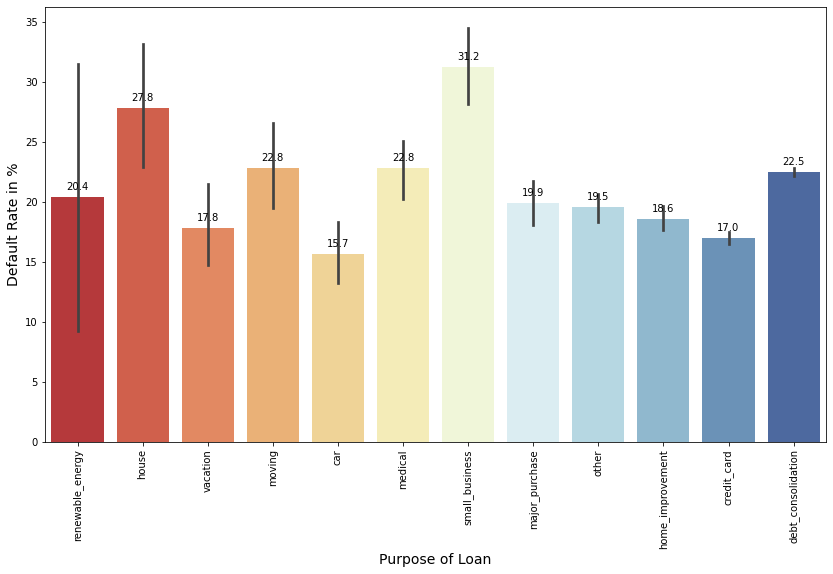

In [107]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
graph_bar('purpose')
plt.xlabel("Purpose of Loan", size=14)

<Figure size 1008x576 with 0 Axes>

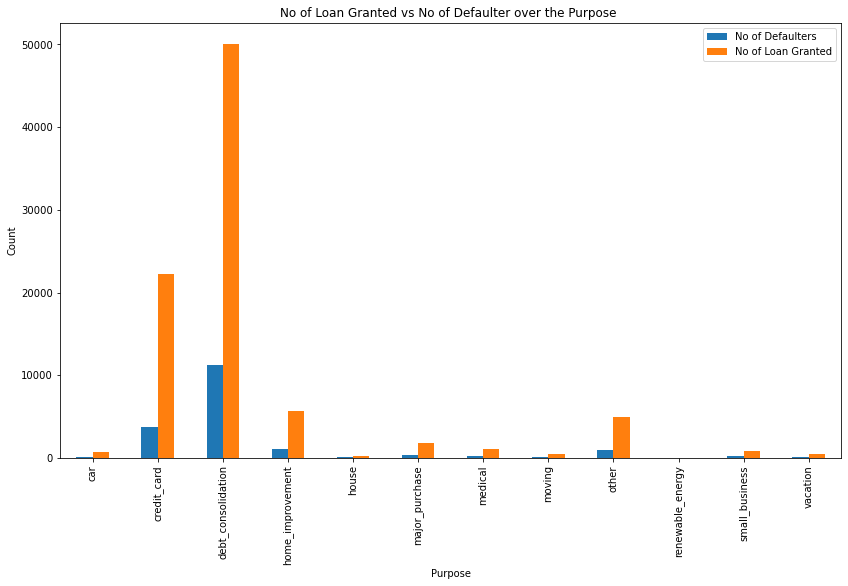

In [108]:
plt.figure(figsize=(14,8))
default_loan_by_purpose = pd.pivot_table(data=df,index='purpose',values='loan_status_binary',aggfunc=[sum,'count'])
default_loan_by_purpose.plot.bar(figsize=(14, 8))
plt.title('No of Loan Granted vs No of Defaulter over the Purpose ')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(['No of Defaulters','No of Loan Granted'])
plt.show()

4. Default Rate wrt issue_d_year

It clearly shows that Person who applied for high terms they are deaulter as well compare to Less Term applicant

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, ' Loan Year')

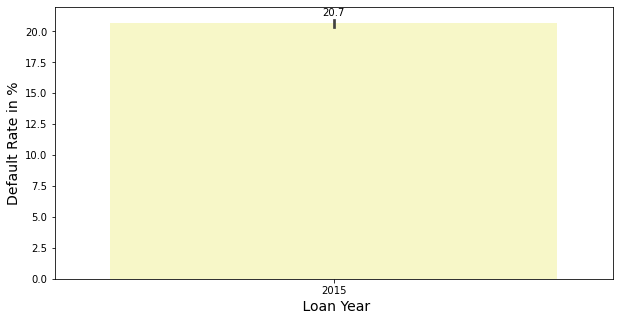

In [114]:
df['issue_d_month'], df['issue_d_year'] = df['issue_d'].str.split('-').str
plt.figure(figsize=(10,5))
graph_bar('issue_d_year')
plt.xlabel(" Loan Year", size=14)

Like above analysis we could do more of like this Univariate Analysis
* Default Rate wrt issue_d_month
* Default Rate wrt emp_length_years
* Default Rate wrt Sub Grade
* Default Rate wrt Home Ownership
* Default Rate wrt Inerest Rate Bucket
* Default Rate wrt Loan Amount Bucket
* Default Rate wrt Debt To Income
* Default Rate wrt State
* Default Rate wrt Verification Status
* Default Rate wrt Employee Income Bucket


Bivariate Analysis 


In [3]:
def graph_bar_biv(x_val,hue):
    result = df.groupby([x_val])['loan_status_binary'].aggregate(sum).reset_index().sort_values('loan_status_binary')
    splot = sns.barplot(x=x_val, y='loan_status_binary',hue=hue,estimator=lambda x: sum(x) / len(x) * 100,
                        data=df,order=result[x_val],palette="RdYlBu")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')
    plt.ylabel("Default Rate in %", size=14)
    #print(result)

Analysis 1 Term Vs Annual Income Vs Default Rate

In [ ]:
plt.figure(figsize=(10,6))
graph_bar_biv('term','annual_inc_bucket')
plt.xlabel(" Loan term with Annual Inc", size=14)